In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys

In [ ]:
# 한장의 이미지에서 다시 쪼개서 입력을 받아옴
# 단순히 쪼개는 것이 아니라 특징적이고 임팩트 있는것만 추려서 온다, (ex 전체 784개중 500개가 특징이 있다면 500개만 가져오는)
# 특정한 연산을 통해 뽑는다. (Convolutional)

# 필터 : 가중치
# strde : 원본이미지에서 필터가 몇칸씩 움직이는지 (움직이는 단위)
# pad : 이미지 테두리에 의미없는 값을 넣는 것
# POOL(Pooling) : 샘플링 (크기를 줄여)(대표적으로 하나를 강조하기위해 특정부분을 따오는 것)
# Pool : 이미지의 손실을 최소하하며 크기를 작게해 효율을 극대화 할 수 있다.
# feature : 컬럼들 중에서 훈련할때 충분한 기여도가 있는 컬럼들 
# CNN은 이미지 분류에만 쓰이는 것이 아니다.

#### 샘플1 : 3 * 3 * 1 * 1 이미지 준비, 2 * 2 * 1 필터 준비   
- 3 * 3 이미지 , 1색상(흑백), 1장 (기본적으로 이미지는 4차원)
- 2 * 필터, 1장

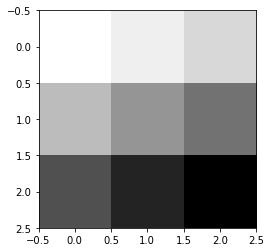

In [4]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype = np.float32)
image.shape
# 갯수 / 크기 3*3 / 색상수
plt.imshow(image.reshape(3, 3), cmap="Greys")

(1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


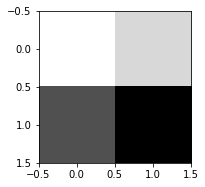

In [9]:
# padding 없이 convolution layer 추출

filter = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]]) #원래 필터는 스스로 학습하는 것이기 때문에 임의로 넣어준 값
filter.shape
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="VALID") 
# strides = 의미없는1 / 가로 한간 /세로 한칸 / 의미없는 1(차원을 맞추기 위해서)
# padding 을 넣지 않을때는 VALID

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)
# 1+2+4+5 / 2+3+5+6 / 4+5+7+8 / 5+6+8+9 
# 12 /16 / 24 / 28 

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap="Greys")


(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


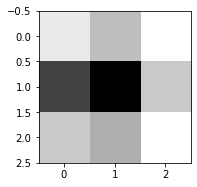

In [10]:
# padding을 이용한 convolution layer 추출

filter = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]]) #원래 필터는 스스로 학습하는 것이기 때문에 임의로 넣어준 값
filter.shape
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME") 
# strides = 의미없는1 / 가로 한간 /세로 한칸 / 의미없는 1(차원을 맞추기 위해서)
# padding 을 넣을 때는 SAME (가로 세로 똑같이 0으로 채우겠다)

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)
# 1+2+4+5 / 2+3+5+6 / 4+5+7+8 / 5+6+8+9 
# 12 /16 / 24 / 28 

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")


(1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


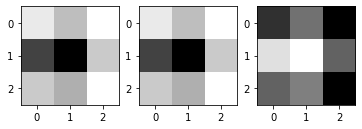

In [12]:
# 3개의 필터사용(2 * 2 * 1 * 3)  -> 레이어가 3장 만들어져야 한다.

filter = tf.constant([[[[1., 10, -1]],[[1., 10, -1]]],
                      [[[1., 10, -1]],[[1., 10, -1]]]]) #원래 필터는 스스로 학습하는 것이기 때문에 임의로 넣어준 값
filter.shape
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME") 
# strides = 의미없는1 / 가로 한간 /세로 한칸 / 의미없는 1(차원을 맞추기 위해서)
# padding 을 넣을 때는 SAME (가로 세로 똑같이 0으로 채우겠다)

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)
# 1+2+4+5 / 2+3+5+6 / 4+5+7+8 / 5+6+8+9 
# 12 /16 / 24 / 28 

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")

In [17]:
# MaxPooling(2 * 2)

image2 = tf.constant([[[[4],[3]],
                        [[2],[1]]]])

pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="VALID" ) #maxpooling 크기만 지정해주어도 된다.
sess=tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)


(1, 1, 1, 1)
[[[[4]]]]


In [18]:
# MaxPooling(2 * 2)

image2 = tf.constant([[[[4],[3]],
                        [[2],[1]]]])

pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="SAME" ) #maxpooling 크기만 지정해주어도 된다.
sess=tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)


(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


### MNIST를 이용한 CNN

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(784,)


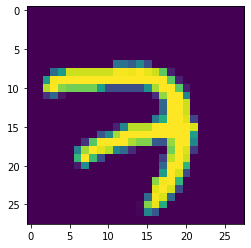

In [10]:
# 데이터 확인 
img = mnist.train.images[0]
print(img.shape)

plt.imshow(img.reshape(28, 28))

In [61]:
# 입력값 준비
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape = [None, 784])
y = tf.placeholder(tf.float32, shape = [None, 10])

In [62]:
# 첫번째 Convolution Layer 준비 (28*28이미지에서 특징을 뽑아내 새로운 이미지를 만들기)
# 필터 : 크기는 3*3 갯수는 32, 색상수는 1

# image는 1차원이므로 4차원으로 바꿔주어야 한다. / 그냥 X값으로 넘겨주면 차원이 다르기 때문에 안된다.
X_img = tf.reshape(X, [-1, 28, 28, 1])
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # 필터는 가중치이므로 W1은 필터가 된다.
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding="SAME")
print(L1) # 패딩을하면 크기가 똑같이 유지되고 안하면 줄어든다.

L1 = tf.nn.relu(L1) # relu로 한번 보정
print(L1)

# 풀링 작업도 꼭 할 필요는 없다
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME")
print(L1)

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


In [63]:
# 두 번째 Convolution Layer 준비
# 필터 : 크기는 3*3, 갯수 64 색상수는 1
W2 = tf.Variable(tf.random_normal([3,3, 32, 64], stddev=0.01)) # 색상수는 계속 가져가므로 갯수를 입력해야한다.
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding="SAME")
print(L2)
L2 = tf.nn.relu(L2)
print(L2)
L2=tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME")
print(L2)

Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


### Simple Fc

In [23]:
#### Fully Connected Layer (Dense Layer)

# 하이퍼 파라미터(hyper parameter) 준비
learning_rate = 0.001
training_epoch = 20
batch_size = 500 

# tensor graph 작성 (y는 위에 미리 작성해놓음)
L2 = tf.reshape(L2,[-1, 7*7*64]) # 4차원을 2차원으로 바꿔주어야한다. -> 평면화작업

W3 = tf.Variable(tf.random_normal([7*7*64, 10]))
b = tf.Variable(tf.random_normal([10]))

# 비용 계산
logit = tf.matmul(L2, W3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y))

#최저 비용 구하기
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### tensor graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epoch):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys})
        avg_cost += c/total_batch
        
    print("epoch:", "%04d"%(epoch+1), "    cost=", "{:.9f}".format(avg_cost))

print("훈련 종료")


epoch: 0001     cost= 0.625850211
epoch: 0002     cost= 0.164451006
epoch: 0003     cost= 0.118556232
epoch: 0004     cost= 0.091621856
epoch: 0005     cost= 0.076944822
epoch: 0006     cost= 0.067492080
epoch: 0007     cost= 0.058324449
epoch: 0008     cost= 0.053118666
epoch: 0009     cost= 0.046739729
epoch: 0010     cost= 0.043410151
epoch: 0011     cost= 0.040252793
epoch: 0012     cost= 0.036505408
epoch: 0013     cost= 0.033224731
epoch: 0014     cost= 0.032821807
epoch: 0015     cost= 0.029007500
epoch: 0016     cost= 0.026288938
epoch: 0017     cost= 0.024646659
epoch: 0018     cost= 0.022953927
epoch: 0019     cost= 0.021393558
epoch: 0020     cost= 0.020679104
훈련 종료


NameError: name 'accuracy' is not defined

In [24]:
# 정확도
is_correct = tf.equal(tf.argmax(logit,1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images,
                                             y:mnist.test.labels}))

정확도 :  0.985


#### Deep FC

+ 레이어 총 3개  사용, 입출력 갯수 128개 사용
+ xavier 초기화
+ dropout 사용
+ training_epoch : 15
+ batch_size = 100

In [59]:
#### Fully Connected Layer (Dense Layer)
# 하이퍼 파라미터(hyper parameter) 준비
learning_rate = 0.001
training_epoch = 15
batch_size = 100 
prob = tf.placeholder(tf.float32)

# tensor graph 작성 
L2 = tf.reshape(L2,[-1, 7*7*64]) 
W3 = tf.get_variable("W3", shape = [7*7*64, 128], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([128]))
logit = tf.matmul(L2, W3) + b
hypot1 = tf.nn.relu(logit)
hypot1 = tf.nn.dropout(hypot1, keep_prob=prob)

W4 = tf.get_variable("W4", shape = [128, 128], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([128]))
logit2 = tf.matmul(hypot1, W4) + b2
hypot2 = tf.nn.relu(logit2)
hypot2 = tf.nn.dropout(hypot2, keep_prob=prob)

W5 = tf.get_variable("W5", shape = [128, 10],initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
logit3 = tf.matmul(hypot2, W5) + b3
hypot3 = tf.nn.softmax(logit3)
hypot3 = tf.nn.dropout(hypot3, keep_prob=prob)

# 비용 계산


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit3, labels=y))

#최저 비용 구하기
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


is_correct = tf.equal(tf.argmax(hypot3,1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

### tensor graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epoch):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys, prob:0.7})
        avg_cost += c/total_batch
        
    print("epoch:", "%04d"%(epoch+1), "    cost=", "{:.9f}".format(avg_cost))

print("훈련 종료")
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images,
                                             y:mnist.test.labels, prob:1}))

epoch: 0001     cost= 0.544909968
epoch: 0002     cost= 0.161731830
epoch: 0003     cost= 0.115805328
epoch: 0004     cost= 0.093398213
epoch: 0005     cost= 0.081681222
epoch: 0006     cost= 0.068695409
epoch: 0007     cost= 0.063793909
epoch: 0008     cost= 0.055340048
epoch: 0009     cost= 0.052345800
epoch: 0010     cost= 0.046436896
epoch: 0011     cost= 0.042370629
epoch: 0012     cost= 0.038211859
epoch: 0013     cost= 0.035825579
epoch: 0014     cost= 0.033413967
epoch: 0015     cost= 0.031664058
훈련 종료
정확도 :  0.9905


In [ ]:
# 선생님 코드

learning_rate = 0.001
training_epoch = 15
batch_size = 100 
prob = tf.placeholder(tf.float32)

L2 = tf.reshape(L2,[-1, 7*7*64]) # 4차원을 2차원으로 바꿔주어야한다.
W3 = tf.get_variable("W3", shape = [7*7*64, 128], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([128]))
logit3 = tf.matmul(L2, W3) + b3
L3 = tf.nn.relu(logit3)
L3 = tf.nn.dropout(L3, keep_prob=prob)

W4 = tf.get_variable("W4", shape = [128, 128], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([128]))
logit4 = tf.matmul(L3, W4) + b4
L4 = tf.nn.relu(logit4)
L4 = tf.nn.dropout(L4, keep_prob=prob)

W5 = tf.get_variable("W5", shape = [128, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logit5 = tf.matmul(L4, W5) + b5
# cost 함수에 softmax_cross_entropy_with_logits_v2 를 썼기 때문에 softmax를 사용하지 않아도 된다.

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit5, labels=y))

#최저 비용 구하기
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


is_correct = tf.equal(tf.argmax(hypot3,1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

### tensor graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epoch):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys, prob:0.7})
        avg_cost += c/total_batch
        
    print("epoch:", "%04d"%(epoch+1), "    cost=", "{:.9f}".format(avg_cost))

print("훈련 종료")
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images,
                                             y:mnist.test.labels, prob:1}))

epoch: 0001     cost= 0.485278321
epoch: 0002     cost= 0.146720408
epoch: 0003     cost= 0.107343161
epoch: 0004     cost= 0.083774315
epoch: 0005     cost= 0.073182316
epoch: 0006     cost= 0.063688113
epoch: 0007     cost= 0.056602669
epoch: 0008     cost= 0.050502903
epoch: 0009     cost= 0.045932692
epoch: 0010     cost= 0.039452361
epoch: 0011     cost= 0.038640013
epoch: 0012     cost= 0.033585322
epoch: 0013     cost= 0.031616145
epoch: 0014     cost= 0.030892855
epoch: 0015     cost= 0.026682566
훈련 종료
정확도 :  0.9916


### 교통표지판 인식 

+ https://benchmark.ini.rub.de/gtsrb_dataset.html
    + GTSRB_Final_Test_Images.zip
    + GTSRB_Final_Training_Images.zip (표지판의 종류 43개)
    

+ 이미지는(32 * 32) > Conv Layer 1 (Pooling) > Conv Layer 2 (Pooling) > FC

#### 이미지 전처리 

In [2]:
import glob 
from skimage.color import rgb2lab # 컬러색상을 lab형태로 바꿔 단순화 시킨다.
from skimage.transform import resize # 이미지의 사이즈 조절 
from collections import namedtuple  # 읽기 전용 dict
np.random.seed(101)

In [3]:
# 상수 정의  (절대로 변하지 않는 값)
N_CLASSES = 43   # 상수는 대문자로 쓰는 것이 관례 
RESIZED_IMAGE = (32, 32)

In [4]:
Dataset = namedtuple("Dataset", ["X", "y"]) 
# dict로 해도 되지만 namedtuple를 쓰면 값을 바꿀수 없어 안전하게 사용할 수 있다.
dir(Dataset)

['X',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'count',
 'index',
 'y']

In [2]:
# 가급적이면 클래스로 관리하는 것이 편하다 .

# 4차원으로 만들어주는 함수 
def to_tf_format(imgs):
    return np.stack([img[:,:,np.newaxis]for img in imgs], axis=0).astype(np.float32) 
#3차원을 계속 쌓아서 4차원으로 만든다.


# 이미지 크기를 재조정하고 색상은 회색조로 변경하기 위한 함수, one-hot encoding
def read_dataset_ppm(rootpath, n_labels, resize_to):
    images = [] # X 값
    labels = [] # y 값
    
    for c in range(n_labels):
        full_path = rootpath +"/" + format(c, "05d") + "/" # rootpath경로안에 5자리만큼 0을채우고 끝에서부터 C라는 값이 채워지는
        
        for img_name in glob.glob(full_path+"*.ppm"):
            img = plt.imread(img_name).astype(np.float32)
            # 회색조 (최대한 컬러색상을 제거)
            img = rgb2lab(img/255.0)[:,:,0] 
            
            img = resize(img, resize_to, mode="reflect")
            
            label = np.zeros((n_labels, ), dtype=np.float32) # n_labels의 갯수만큼 0으로 채워주곘다.
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
            
    return Dataset(X=to_tf_format(images), y=np.array(labels))
#--------------------------------------------------------
ds = read_dataset_ppm("data/GTSRB/Final_Training/Images", N_CLASSES, RESIZED_IMAGE)

print(ds.X.shape) #텐서플로우에서 입력받는 이미지값은 4차원이여야 한다.
print(ds.y.shape)


NameError: name 'N_CLASSES' is not defined

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


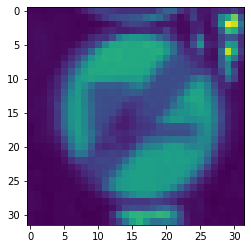

In [6]:
# 데이터 확인
plt.imshow(ds.X[0,:,:,:].reshape(RESIZED_IMAGE))
print(ds.y[0,:])

plt.imshow(ds.X[-1,:,:,:].reshape(RESIZED_IMAGE))
print(ds.y[-1,:])

In [8]:
# 훈련 데이터와 테스트 데이터 분리

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(range(ds.X.shape[0]), ds.y, test_size=0.25, random_state=101) 


#np.array(X_train).shape   예전처럼 하면 안된다

idx_train, idx_test = train_test_split(range(ds.X.shape[0]), test_size=0.25, random_state =101)
X_train = ds.X[idx_train, :, :, :]
X_test = ds.X[idx_test, :, :, :]
y_train = ds.y[idx_train, :]
y_test = ds.y[idx_test,:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(29406, 32, 32, 1)
(9803, 32, 32, 1)
(29406, 43)
(9803, 43)


#### 훈련(학습)과 예측

In [24]:
#### 미니배치 준비
def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0] # X 와 y의 갯수는 똑같아야 한다. 
    n_samples = X.shape[0] #전체 데이터의 갯수 29406개
    
    if shuffle :
        idx = np.random.permutation(n_samples) 
    else:
        idx = range(n_samples)
    
    for i in range(int(np.ceil(n_samples/batch_size))): # mnist의 next_batch함수와 같은 원리
        from_idx = i * batch_size
        to_idx = (i + 1) * batch_size
        yield X[idx[from_idx : to_idx],:,:,:], y[idx[from_idx:to_idx],:]
        #yield를 쓰는 이유 return을 쓰면 한번만 돌고 끝남 

In [27]:
#### 미니배치 함수 테스트
for i in minibatcher(X_train, y_train,10000, True): # True 값은 섞을것인지 말것인지를 결정하는 인자
    print(i[0].shape, i[1].shape)

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(9406, 32, 32, 1) (9406, 43)


In [28]:
# 모듈화 
def fc_no_activation_layer(in_tensors, n_units):
    W = tf.get_variable("fc_W", shape = [in_tensors.get_shape()[1], n_units], 
                        initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("fc_b", shape = [n_units], initializer=tf.constant_initializer(0.0)) #0으로 초기화
    return tf.matmul(in_tensors, W) + b

In [29]:
# activation 모듈
def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units))

In [31]:
# Convolution Layer 모듈화
def conv_layer(in_tensors, kernel_size, n_units):
    W = tf.get_variable("conv_W", [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units], 
                        initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("conv_b", shape = [n_units], initializer=tf.constant_initializer(0.0))
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, W, [1, 1, 1, 1], "SAME") + b) 

In [32]:
def maxpool_layer(in_tensors, sampling ):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], 
                          [1, sampling, sampling, 1], "SAME")
    

In [42]:
def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors, keep_proba),lambda:in_tensors)

#### Model Specification

+ 2차원 convolution 5 * 5 , 32 필터를 준비
+ 2차원 convolution 5 * 5 , 64 필터를 준비
+ 평면화 계층 (Flat layer)
+ Full Connected Layer, 1024개의 이미지 (입출력갯수를 1024개)
+ dropout 40% 
+ Softmax 

In [43]:
def model(in_tensors, is_training):
    # First Layer : 5 * 5 2d convolution layer, 32 filters, 2x maxpool, 20% dropout
    with tf.variable_scope("L1"):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32),2)
        l1_out = dropout(l1, 0.8, is_training)
    
    # Second Layer : 5 * 5 2d convolution layer, 64 filters, 2x maxpool, 20% dropout
    with tf.variable_scope("L2"):
        l2 = maxpool_layer(conv_layer(in_tensors, 5, 64),2)
        l2_out = dropout(l2, 0.8, is_training)
    
    # 평면화 작업(Flat Layer)
    with tf.variable_scope("flatten"):
        l2_out_flat = tf.layers.flatten(l2_out)
        
    # Fully Connected Layer, 1024 neurons, 40% dropout
    with tf.variable_scope("L3"):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out= dropout(l3, 0.6, is_training)
        
    # output
    with tf.variable_scope("out"):
        out_tensors = fc_no_activation_layer(l3_out, N_CLASSES) 
        # 여기 들어가는 units는 분류(전체 종류)의 갯수 43개
    
    return out_tensors

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
def train_model(X_train, y_train, learning_rate, max_epochs, batch_size):
    in_X_tensors_batch = tf.placeholder(tf.float32, 
                                        shape = (None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1)) 
    # 훈련데이터를 가져오는 것이기 때문에 29406개 (데이터의 갯수를 생각할 필요없기 때문에 None으로 처리)
    # 위에서 RESIZED_IMAGE를 (32, 32)로 선언했기 때문에 RESIZED_IMAGE를 사용가능
    # 함수는 한번 선언하고 실행만 하는 것이 좋기때문에 변수로 처리하는 것이 좋다 
    in_y_tensors_batch = tf.placeholder(tf.float32, shape = (None, N_CLASSES))
    is_training = tf.placeholder(tf.bool)
    
    logit = model(in_X_tensors_batch, is_training) # 기본적인 선형함수 모델이 들어가게 된다.
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=in_y_tensors_batch))
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(max_epochs):
            print("Epoch=", epoch)
            tf_score = [] 
            
            for mb in minibatcher(X_train, y_train, batch_size, shuffle=True):
                _, c, = sess.run([train,cost], feed_dict={in_X_tensors_batch:mb[0], 
                                                          in_y_tensors_batch:mb[1],
                                                          is_training : True})
                tf_score.append(c)
            print(" train loss score=", np.mean(tf_score))
            
        # 훈련이 끝난 후 테스트
        print("TEST SET PERFORMANCE")
        out_y_pred = tf.nn.softmax(logit) # hypotsis
        y_test_pred, test_cost = sess.run([out_y_pred, cost], 
                                          feed_dict={in_X_tensors_batch:X_test, 
                                                     in_y_tensors_batch:y_test,
                                                     is_training : False}) # 테스트용이기 떄문에 dropout은 하면 안된다.
        print(" test_loss_score=", test_cost)
        y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
        y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
        print(classification_report(y_test_true_classified, y_test_pred_classified))
    
        cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)
    
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        plt.tight_layout()
        plt.show()
    
        # And the log2 version, to enphasize the misclassifications
        plt.imshow(np.log2(cm + 1), interpolation='nearest', cmap=plt.get_cmap("tab20"))
        plt.colorbar()
        plt.tight_layout()
        plt.show()

Epoch= 0
 train loss score= 16.312155
Epoch= 1
 train loss score= 0.8810675
Epoch= 2
 train loss score= 0.5806839
Epoch= 3
 train loss score= 0.39136496
Epoch= 4
 train loss score= 0.32913098
Epoch= 5
 train loss score= 0.2598629
Epoch= 6
 train loss score= 0.21548681
Epoch= 7
 train loss score= 0.1842296
Epoch= 8
 train loss score= 0.136755
Epoch= 9
 train loss score= 0.17616442
TEST SET PERFORMANCE
 test_loss_score= 0.17923826
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.98      0.89      0.93       539
           2       0.84      0.98      0.90       558
           3       0.97      0.92      0.94       364
           4       0.96      0.95      0.95       487
           5       0.98      0.90      0.94       479
           6       0.99      0.99      0.99       105
           7       0.95      0.95      0.95       364
           8       0.95      0.98      0.96       340
           9       0.96   

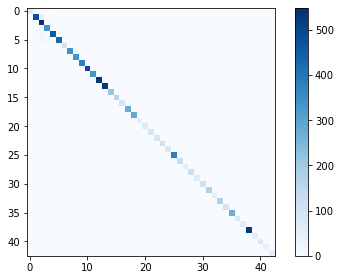

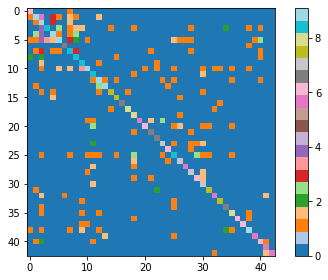

In [54]:
tf.reset_default_graph()
train_model(X_train, y_train, 0.001, 10, 256) #epoch 전체 데이터셋의 반복 횟수
# F1 과 리콜이 크게 차이가 나지 않기 때문에 과대적합이나 과소적합이 보이지는 않음

In [ ]:
"""
1. 일부 CNN계층과 FC 계층을 추가/ 삭제를 통해서 성능이 어떻게 변하는지 확인
2. drop의 비율을 변경해보면서 결과가 과소적합 또는 과대적합 되는지 확인
3. 전체 epoch 횟수와 batch size도 변경해서 결과 확인 
4. 실제 테스트 이미지를 통해서 사용할 수 있는 프로그램 작성
"""
